In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/khdl/Luxury watch.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Complications        385 non-null    object 
 12  Power Reserve        493 non-null    object 
 13  Price (USD)          506 non-null    object 
dtypes: float64(3), object(11)
memory usage: 55.6+ KB
None


In [5]:
df.head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,"2,800"


In [6]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Complications        385 non-null    object 
 12  Power Reserve        493 non-null    object 
 13  Price (USD)          506 non-null    object 
dtypes: float64(3), object(11)
memory usage: 55.6+ KB


,0
Brand,0
Model,0
Case Material,0
Strap Material,0
Movement Type,0
Water Resistance,0
Case Diameter (mm),0
Case Thickness (mm),0
Band Width (mm),0
Dial Color,0


<Axes: >

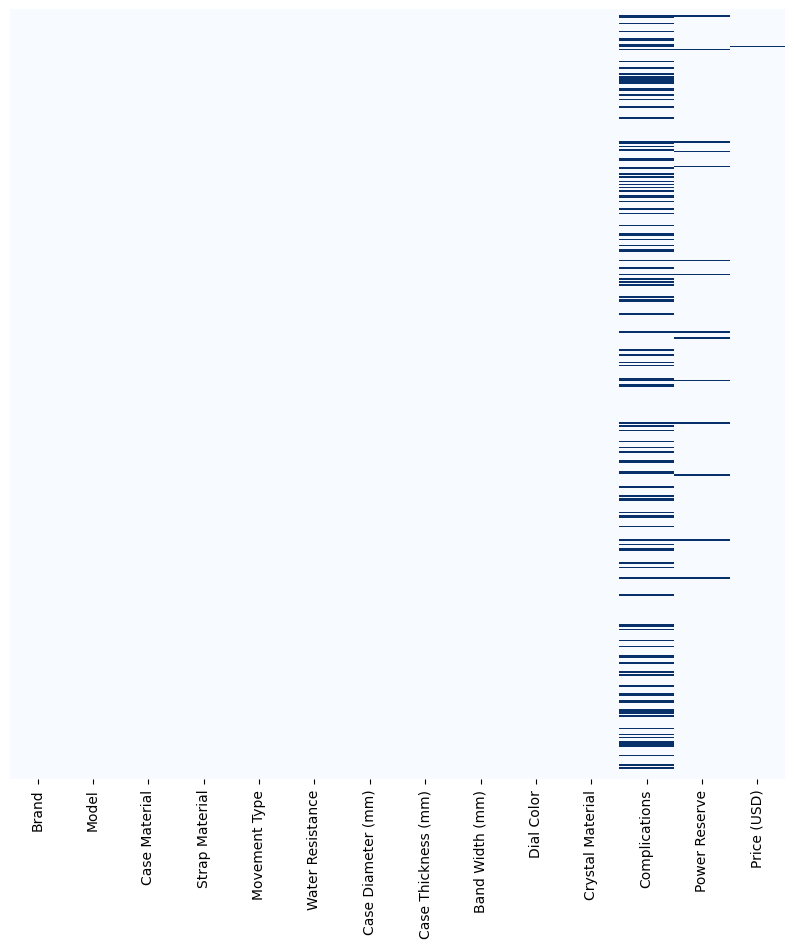

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.isna(), cbar=False, cmap='Blues', yticklabels=False)

In [8]:
df.columns = df.columns.str.replace(r"\s*\(.*?\)", "", regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             507 non-null    object 
 1   Model             507 non-null    object 
 2   Case Material     507 non-null    object 
 3   Strap Material    507 non-null    object 
 4   Movement Type     507 non-null    object 
 5   Water Resistance  507 non-null    object 
 6   Case Diameter     507 non-null    float64
 7   Case Thickness    507 non-null    float64
 8   Band Width        507 non-null    float64
 9   Dial Color        507 non-null    object 
 10  Crystal Material  507 non-null    object 
 11  Complications     385 non-null    object 
 12  Power Reserve     493 non-null    object 
 13  Price             506 non-null    object 
dtypes: float64(3), object(11)
memory usage: 55.6+ KB


In [9]:
df['Case Material'].value_counts()

,count
Case Material,
Stainless Steel,404
Titanium,37
Rose Gold,12
18k Rose Gold,10
Ceramic,9
White Gold,9
18k White Gold,7
18K White Gold,5
18K Rose Gold,3


In [10]:
df['Case Material'] = df['Case Material'].str.lower()

def normalize_case_material(x):
    if 'rose gold' in x or 'king gold' in x:
        return 'Rose Gold'
    elif 'white gold' in x:
        return 'White Gold'
    elif 'yellow gold' in x:
        return 'Yellow Gold'
    elif 'steel' in x:
        return 'Stainless Steel'
    elif 'titanium' in x:
        return 'Titanium'
    elif 'ceramic' in x:
        return 'Ceramic'
    elif 'carbon' in x:
        return 'Carbon Fiber'
    elif 'bronze' in x:
        return 'Bronze'
    else:
        return x.title()

df['Case Material'] = df['Case Material'].apply(normalize_case_material)

print(df['Case Material'].value_counts())

Case Material
Stainless Steel    405
Titanium            37
Rose Gold           26
White Gold          21
Ceramic             10
Yellow Gold          4
Carbon Fiber         3
Bronze               1
Name: count, dtype: int64


In [11]:
df['Strap Material'].value_counts()

,count
Strap Material,
Leather,224
Stainless Steel,166
Rubber,74
Fabric,11
Canvas,10
Silicone,5
NATO Strap,4
Jubilee Bracelet,3
Jubilee,2


In [12]:
def normalize_strap_material(x):
    if not isinstance(x, str):
        return x
    x = x.lower().strip()
    mapping = {
        'leather': 'Leather',
        'stainless steel': 'Stainless Steel',
        'rubber': 'Rubber',
        'fabric': 'Fabric',
        'canvas': 'Fabric',
        'silicone': 'Rubber',
        'nato strap': 'NATO',  # hoặc NATO nếu bạn muốn tạo nhóm riêng
        'jubilee bracelet': 'Stainless Steel',
        'jubilee': 'Stainless Steel',
        'alligator': 'Leather',
        'rose gold': 'Gold',
        'titanium': 'Titanium',
        'textile': 'Fabric',
    }
    return mapping.get(x, x.title())

df['Strap Material'] = df['Strap Material'].apply(normalize_strap_material)

print(df['Strap Material'].value_counts())

Strap Material
Leather            226
Stainless Steel    171
Rubber              79
Fabric              22
NATO                 5
Titanium             2
Gold                 2
Name: count, dtype: int64


In [13]:
df['Movement Type'].value_counts()

,count
Movement Type,
Automatic,442
Manual,51
Quartz,12
Eco-Drive,2


In [14]:
df['Water Resistance'] = df['Water Resistance'].str.replace(' meters', '', regex=False).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             507 non-null    object 
 1   Model             507 non-null    object 
 2   Case Material     507 non-null    object 
 3   Strap Material    507 non-null    object 
 4   Movement Type     507 non-null    object 
 5   Water Resistance  507 non-null    int64  
 6   Case Diameter     507 non-null    float64
 7   Case Thickness    507 non-null    float64
 8   Band Width        507 non-null    float64
 9   Dial Color        507 non-null    object 
 10  Crystal Material  507 non-null    object 
 11  Complications     385 non-null    object 
 12  Power Reserve     493 non-null    object 
 13  Price             506 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 55.6+ KB


In [15]:
df['Dial Color'].value_counts()

,count
Dial Color,
Black,217
Blue,136
Silver,118
White,33
Ivory,1
Champagne,1
Grey,1


In [16]:
def normalize_dial_color(x):
    if not isinstance(x, str):
        return x
    x = x.lower().strip()
    mapping = {
        'black': 'Black',
        'blue': 'Blue',
        'silver': 'Silver',
        'white': 'White',
        'ivory': 'Others',
        'champagne': 'Others',
        'grey': 'Others',
    }
    return mapping.get(x, x.title())

df['Dial Color'] = df['Dial Color'].apply(normalize_dial_color)

print(df['Dial Color'].value_counts())

Dial Color
Black     217
Blue      136
Silver    118
White      33
Others      3
Name: count, dtype: int64


In [17]:
df['Crystal Material'].value_counts()

,count
Crystal Material,
Sapphire,489
Hesalite,13
Hardlex,3
Mineral,2


In [18]:
def normalize_crystal_material(x):
    if not isinstance(x, str):
        return x
    x = x.lower().strip()
    if x == 'sapphire':
        return 'Sapphire'
    elif x in ['hesalite', 'hardlex', 'mineral']:
        return 'Non-Sapphire'
    else:
        return x.title()

df['Crystal Material'] = df['Crystal Material'].apply(normalize_crystal_material)

print(df['Crystal Material'].value_counts())

Crystal Material
Sapphire        489
Non-Sapphire     18
Name: count, dtype: int64


In [19]:
df['Complications'].value_counts()

,count
Complications,
Date,234
Chronograph,78
"Chronograph, Date",10
"Date, Chronograph",9
"Chronograph, Tachymeter",7
"GMT, Date",5
GMT,4
"Date, Power Reserve Indicator",4
"Date, GMT",4


In [20]:
df[df['Complications'].str.contains('Day/Date', case=False, na=False)]

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter,Case Thickness,Band Width,Dial Color,Crystal Material,Complications,Power Reserve,Price
116,Seiko,Prospex,Stainless Steel,Rubber,Automatic,200,44.3,12.7,20.0,Blue,Sapphire,Day/Date,41 hours,"1,200"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             507 non-null    object 
 1   Model             507 non-null    object 
 2   Case Material     507 non-null    object 
 3   Strap Material    507 non-null    object 
 4   Movement Type     507 non-null    object 
 5   Water Resistance  507 non-null    int64  
 6   Case Diameter     507 non-null    float64
 7   Case Thickness    507 non-null    float64
 8   Band Width        507 non-null    float64
 9   Dial Color        507 non-null    object 
 10  Crystal Material  507 non-null    object 
 11  Complications     385 non-null    object 
 12  Power Reserve     493 non-null    object 
 13  Price             506 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 55.6+ KB


In [22]:
df['Complications'].head()

,Complications
0,Date
1,Date
2,Chronograph
3,Chronograph
4,NaN


In [23]:
df['Complications'] = df['Complications'].fillna('None').astype(str)

In [24]:
df['Complications'] = df['Complications'].str.replace(', ', ',')
df['Complications'] = df['Complications'].str.split(',')

score_dict = {
    'None': 0,
    'Date': 1,
    'GMT': 2,
    'Chronograph': 3,
    'Tachymeter': 2,
    'Moonphase': 2,
    'Moon Phase': 2,
    'Power Reserve': 2,
    'Power Reserve Indicator': 2,
    'Flyback': 3,
    'World Time': 2,
    'Stopwatch': 1,
    'Sub Seconds': 1,
    'Cyclops': 1,
    'Cyclops Lens': 1,
    'Rotating Bezel': 1,
    'Unidirectional Bezel': 1,
    'Dual Time Zone': 2,
    'Second Time Zone': 2,
    'Day/Date': 1
}

df['Complication_Score'] = df['Complications'].apply(
    lambda lst: sum(score_dict.get(comp.strip(), 0) for comp in lst)
)

print(df[['Complications', 'Complication_Score']])


     Complications  Complication_Score
0           [Date]                   1
1           [Date]                   1
2    [Chronograph]                   3
3    [Chronograph]                   3
4           [None]                   0
..             ...                 ...
502         [Date]                   1
503         [Date]                   1
504         [Date]                   1
505         [Date]                   1
506         [Date]                   1

[507 rows x 2 columns]


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               507 non-null    object 
 1   Model               507 non-null    object 
 2   Case Material       507 non-null    object 
 3   Strap Material      507 non-null    object 
 4   Movement Type       507 non-null    object 
 5   Water Resistance    507 non-null    int64  
 6   Case Diameter       507 non-null    float64
 7   Case Thickness      507 non-null    float64
 8   Band Width          507 non-null    float64
 9   Dial Color          507 non-null    object 
 10  Crystal Material    507 non-null    object 
 11  Complications       507 non-null    object 
 12  Power Reserve       493 non-null    object 
 13  Price               506 non-null    object 
 14  Complication_Score  507 non-null    int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 59.5+ K

In [26]:
df['Power Reserve'].value_counts()

,count
Power Reserve,
60 hours,82
42 hours,55
70 hours,50
50 hours,40
72 hours,38
120 hours,30
45 hours,29
48 hours,27
38 hours,27


In [27]:
df['Power Reserve'] = df['Power Reserve'].apply(lambda x:
    float(x.replace(' days', '').strip().replace(',', '')) * 24 if isinstance(x, str) and 'days' in x
    else float(x.replace(' hours', '').strip().replace(',', '')) if isinstance(x, str)
    else x)
df['Power Reserve'] = df['Power Reserve'].fillna(df['Power Reserve'].median())

In [28]:
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

In [29]:
df['Price'] = df['Price'].fillna(df['Price'].median())

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               507 non-null    object 
 1   Model               507 non-null    object 
 2   Case Material       507 non-null    object 
 3   Strap Material      507 non-null    object 
 4   Movement Type       507 non-null    object 
 5   Water Resistance    507 non-null    int64  
 6   Case Diameter       507 non-null    float64
 7   Case Thickness      507 non-null    float64
 8   Band Width          507 non-null    float64
 9   Dial Color          507 non-null    object 
 10  Crystal Material    507 non-null    object 
 11  Complications       507 non-null    object 
 12  Power Reserve       507 non-null    float64
 13  Price               507 non-null    float64
 14  Complication_Score  507 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 59.5+ KB

<Axes: xlabel='Price', ylabel='Count'>

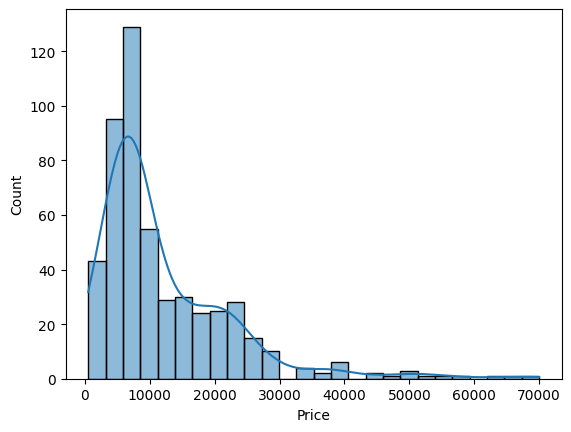

In [31]:
sns.histplot(df['Price'], kde=True)

In [33]:
df.to_csv('/content/drive/MyDrive/khdl/luxury_watches_preprocessed.csv', index=False)